In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


# **1.Frame the Problem and Look at the Big Picture**
#### * classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai
#### * supervised/offline learning classification
#### * baseline: XX% accuracy


# **2.Get the Data**

In [2]:
import pandas as pd
date_fruit_all=pd.read_excel('../input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

date_fruit_all.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# **3.Explore the Data**

In [3]:
#Check the number of instances(898) and features(34) 
date_fruit_all.shape

(898, 35)

In [4]:
#Check if there is null value
date_fruit_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
date_fruit_all.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


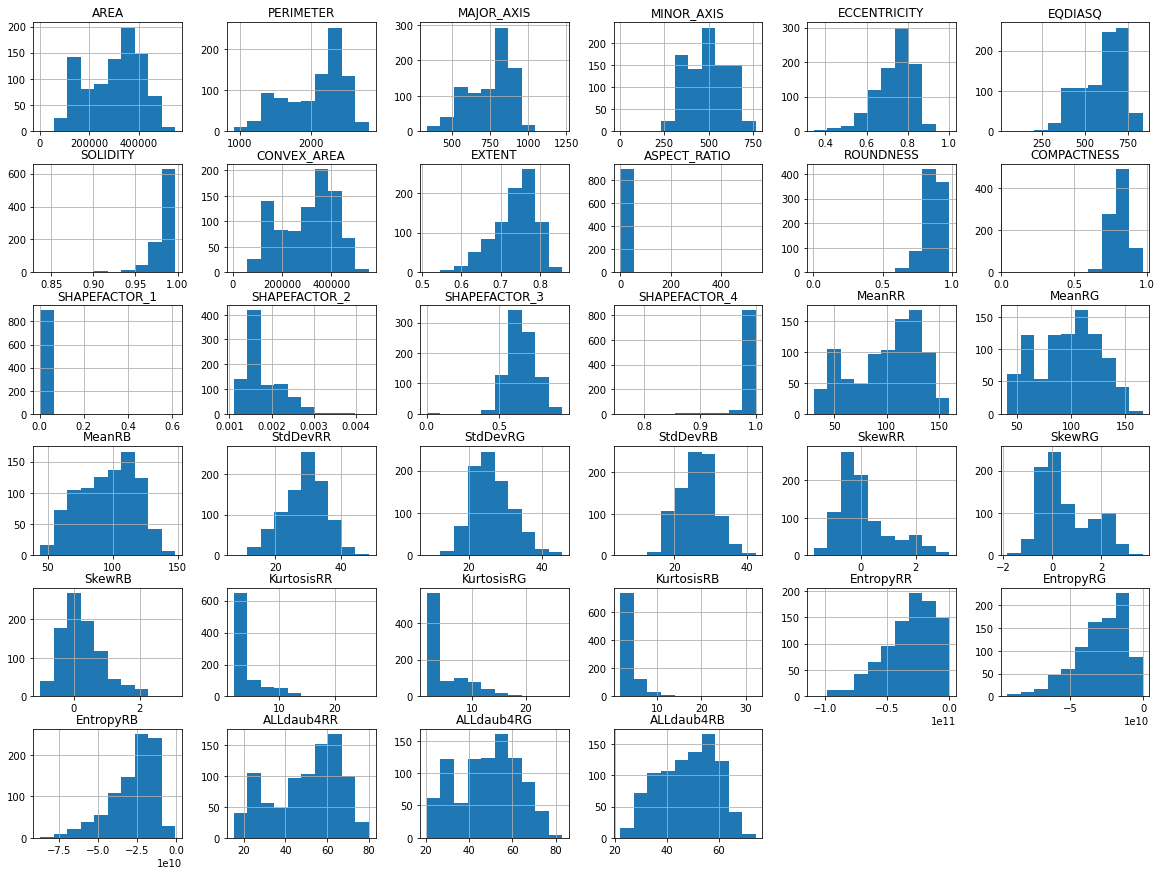

In [6]:
#visualize the distribution
%matplotlib inline
import matplotlib.pyplot as plt
date_fruit_all.hist(bins=10, figsize=(20,15))
plt.show()

# **4.Prepare the Data**

In [7]:
#Make a copy of dataset
date_fruit_all_copy=pd.DataFrame.copy(date_fruit_all)

In [13]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(X_scaled, test_size=0.2, random_state=42, stratify=date_fruit_all_copy["Class"])

In [20]:
#Seperate features and label
train_set_X = train_set.drop("Class", axis=1) # drop labels for training set
train_set_y = train_set["Class"]

test_set_X = test_set.drop("Class", axis=1) # drop labels for testing set
test_set_y = test_set["Class"]

#Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_set_X)
train_set_X_scaled = scaler.transform(train_set_X)

scaler = StandardScaler().fit(test_set_X)
test_set_X_scaled = scaler.transform(test_set_X)


# **5.Train Model and Make Prediction**

In [25]:
#Train model 
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, max_iter=10000)
softmax_reg.fit(train_set_X_scaled, train_set_y )

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial')

In [28]:
# Make prediction on testing set
test_set_y_preds= softmax_reg.predict(test_set_X_scaled)

# Compute accuracy of predictions
from sklearn.metrics import accuracy_score
score = accuracy_score(test_set_y, test_set_y_preds)

In [29]:
score

0.9111111111111111